In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

LOADING THE CSV FILE

In [29]:
df = pd.read_csv('/Users/shegavala/Downloads/bestsellers with categories.csv')

In [30]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [31]:
df.head()
                   

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Find if there is a null value

In [32]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


CHEKING FOR NULL VALUE

In [33]:
df.isna().mean().to_frame()

,0
Name,0.0
Author,0.0
User Rating,0.0
Reviews,0.0
Price,0.0
Year,0.0
Genre,0.0


Yay ..there is no missing value

DATA UNDERSTENDING

In [34]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Showing discriptive statistic:
550 books
avg price $13
max reviews 87841
avg reviews 11953
avg rating 4.7
max rating 4.9
years 2009-2019

In [35]:
df['Genre'].value_counts().to_frame()

,Genre
Non Fiction,310
Fiction,240


/Users/shegavala/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


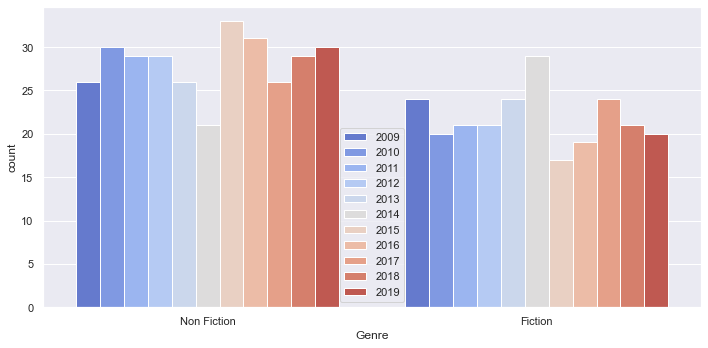

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(df.Genre,hue=df.Year,palette='coolwarm')
plt.legend()
plt.tight_layout()

there are more non-fiction books than fiction 

In [37]:
Book_review = df[['Name', 'Author', 'Reviews', 'User Rating', 'Year','Genre']]
Book_review= Book_review.sort_values('Reviews', ascending=False)[:10]
Book_review

,Name,Author,Reviews,User Rating,Year,Genre
534,Where the Crawdads Sing,Delia Owens,87841,4.8,2019,Fiction
382,The Girl on the Train,Paula Hawkins,79446,4.1,2015,Fiction
383,The Girl on the Train,Paula Hawkins,79446,4.1,2016,Fiction
32,Becoming,Michelle Obama,61133,4.8,2018,Non Fiction
33,Becoming,Michelle Obama,61133,4.8,2019,Non Fiction
137,Gone Girl,Gillian Flynn,57271,4.0,2014,Fiction
135,Gone Girl,Gillian Flynn,57271,4.0,2012,Fiction
136,Gone Girl,Gillian Flynn,57271,4.0,2013,Fiction
368,The Fault in Our Stars,John Green,50482,4.7,2014,Fiction
367,The Fault in Our Stars,John Green,50482,4.7,2014,Fiction


The fiction book: Where the Crawdads Sing by Delia Owens is the must reviewed book by ammazon users with 87841 reviews

In [38]:
Books_rating = df[['Name', 'Author', 'Reviews', 'User Rating', 'Year','Genre']]
Books_rating = Books_rating.sort_values('User Rating', ascending=False)[:10]
Books_rating

,Name,Author,Reviews,User Rating,Year,Genre
431,The Magnolia Story,Chip Gaines,7861,4.9,2016,Non Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,5470,4.9,2018,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,12619,4.9,2019,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,7235,4.9,2019,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,7235,4.9,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4786,4.9,2017,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,5062,4.9,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,21834,4.9,2019,Fiction
476,The Very Hungry Caterpillar,Eric Carle,19546,4.9,2013,Fiction
477,The Very Hungry Caterpillar,Eric Carle,19546,4.9,2014,Fiction


The book with the highest rating is The Mahnolia Story by Chip Gaines with 7861 reviews and 4.9 rating

The impact of rating and number of reviews using 

In [39]:
new_df = df[df["Author"] == "Delia Owens"]
new_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


The impact of price and the number of reviews using svm model 

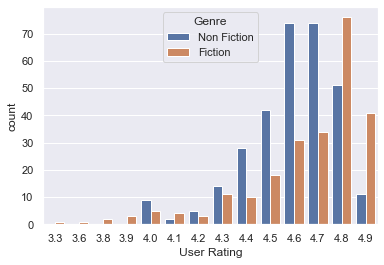

In [46]:
ax = sns.countplot(x = 'User Rating', data = df, hue = 'Genre')

/Users/shegavala/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

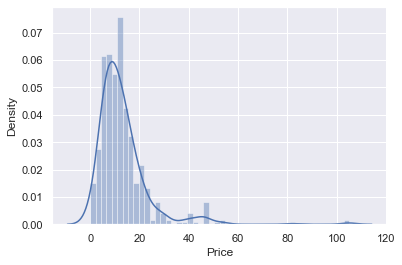

In [138]:
sns.distplot(df["Price"])

/Users/shegavala/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='User Rating', ylabel='Density'>

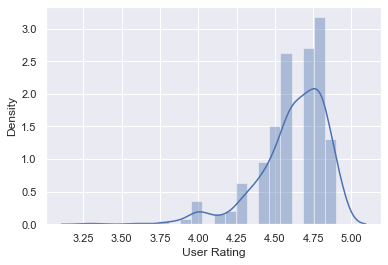

In [141]:
sns.distplot(df["User Rating"])

/Users/shegavala/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

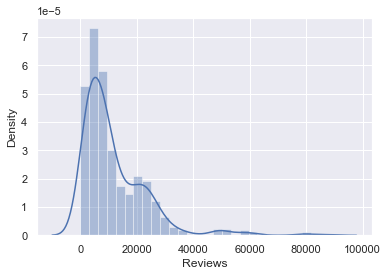

In [143]:
sns.distplot(df["Reviews"])

In [70]:
df.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


x = features (what columns do we want to use to predict our target)
y = target that we are trying to predict (genre)

Modeling

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_

In [117]:
X = df[['Year', 'User Rating','Reviews']]
y = df['Genre']
len(X) == len(y) #very nothing went wrong

True

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3162)

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [121]:
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("First 50 predicted values:", y_pred[:50])

First 50 predicted values: ['Non Fiction' 'Non Fiction' 'Non Fiction' 'Fiction' 'Non Fiction'
 'Non Fiction' 'Fiction' 'Non Fiction' 'Non Fiction' 'Non Fiction'
 'Non Fiction' 'Non Fiction' 'Non Fiction' 'Non Fiction' 'Fiction'
 'Non Fiction' 'Non Fiction' 'Fiction' 'Non Fiction' 'Fiction' 'Fiction'
 'Fiction' 'Non Fiction' 'Non Fiction' 'Fiction' 'Fiction' 'Fiction'
 'Non Fiction' 'Fiction' 'Fiction' 'Fiction' 'Non Fiction' 'Fiction'
 'Non Fiction' 'Fiction' 'Non Fiction' 'Fiction' 'Fiction' 'Non Fiction'
 'Non Fiction' 'Non Fiction' 'Non Fiction' 'Fiction' 'Non Fiction'
 'Non Fiction' 'Non Fiction' 'Non Fiction' 'Non Fiction' 'Fiction'
 'Fiction']


<AxesSubplot:>

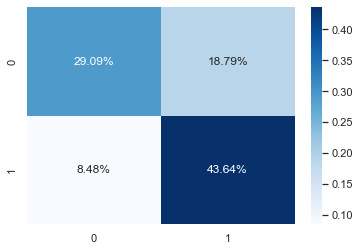

In [122]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    matrix/np.sum(matrix),
    annot=True,
    cmap='Blues',
    fmt='.2%')

In [134]:
cm = confusion_matrix(y_test, y_test)
print(cm)


[[79  0]
 [ 0 86]]


In [153]:
from sklearn.preprocessing import LabelEncoder
book1 = df.copy(deep = True)
Genre = LabelEncoder()
book1['Genre'] = Genre.fit_transform(df['Genre'])

book2 = book1.copy(deep = True)
Author = LabelEncoder()
book2['Author'] = Author.fit_transform(book1['Author'])

book3 = book2.copy(deep = True)
Name = LabelEncoder()
book3['Name'] = Name.fit_transform(book2['Name'])

book4 = book3.copy(deep = True)
Name = LabelEncoder()
book4['User Rating'] = Name.fit_transform(book3['User Rating'])

In [154]:
X = np.array(book4[['Name', 'Author', 'Reviews', 'Price', 'Year', 'Genre']])

In [155]:
y = np.array(book4["User Rating"]) 

In [ ]:
X

In [ ]:
y

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 100)                                    


In [166]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)
y_1 = reg.predict(X_test)

y_1


array([10.6156883 ,  9.60098311, 10.56921083, 11.75536543,  9.30731912,
       10.56307748, 10.48620177,  9.96472939, 10.9471195 ,  8.89127606,
       11.40638493, 10.34050677,  9.87446431, 10.26927259, 11.07330377,
       10.19255385,  9.53242157, 10.58452977, 11.03803909, 11.57485222,
       10.78301921, 10.9717463 , 11.15279501, 10.06858971, 10.93964777,
        9.76863961, 10.31010544, 10.41708249, 10.00612285,  8.8755808 ,
        9.29078435, 10.42434809,  9.32444389, 10.42827657, 10.23644029,
       10.96138784, 10.05272377,  9.10639652,  9.41704253,  8.98827242,
        9.77122029, 10.87871394,  9.06173504,  9.13393343,  8.71253223,
       11.03432118,  9.02981071,  9.19085224, 10.1102674 , 11.42430398,
        9.94332332,  9.71818796,  9.44797041, 11.28201894, 11.19348826,
       10.62593693,  8.32506731, 10.49020271, 10.71775434,  9.89808618,
        8.91596082,  9.60501455,  9.00704075,  9.52257597,  9.66633633,
        9.04176492, 10.698186  , 11.78502405,  9.29231567,  9.56

In [172]:
print("Mean: " + str(mean_absolute_error(y_test, y_1)))

Mean: 1.6666785907987143


In [171]:
print("R2_score: " + str(r2_score(y_test, y_1)))


R2_score: -0.009373168157825518
